# Week 2 - Preprocessing, part 2

# 1. Lesson: None

# 2. Weekly graph question

The Storytelling With Data book mentions planning on a "Who, What, and How" for your data story.  Write down a possible Who, What, and How for your data, using the ideas in the book.

Who - doctors, public health officials, policy makers

What - examine which health factors are related to diabetes risk and diagnosis in order to help prevent diabetes in the general population

How - explore correlations and patterns in the health factors using visualizations such as correlation matrices and bar charts; build a regression model to detect patients that are at risk of developing or being diagnosed with diabetes

# 3. Homework - work with your own data

In [4]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta

This week, you will do the same types of exercises as last week, but you should use your chosen datasets that someone in your class found last semester. (They likely will not be the particular datasets that you found yourself.)

### Here are some types of analysis you can do  Use Google, documentation, and ChatGPT to help you:

- Summarize the datasets using info() and describe()

- Are there any duplicate rows?

- Are there any duplicate values in a given column (when this would be inappropriate?)

- What are the mean, median, and mode of each column?

- Are there any missing or null values?

    - Do you want to fill in the missing value with a mean value?  A value of your choice?  Remove that row?

- Identify any other inconsistent data (e.g. someone seems to be taking an action before they are born.)

- Encode any categorical variables (e.g. with one-hot encoding.)

### Conclusions:

- Are the data usable?  If not, find some new data!

- Do you need to modify or correct the data in some way?

- Is there any class imbalance?  (Categories that have many more items than other categories).

DATASET 1: Diabetes Health Indicators

In [ ]:
df = pd.read_csv("diabetes_012_health_indicators_BRFSS2015.csv")

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_012          253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   HeartDiseaseorAttack  253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
 15  

In [48]:
df.describe()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,...,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000
mean,0.296921,0.429001,0.424121,0.962670,28.382364,0.443169,0.040571,0.094186,0.756544,0.634256,...,0.951053,0.084177,2.511392,3.184772,4.242081,0.168224,0.440342,8.032119,5.050434,6.053875
std,0.698160,0.494934,0.494210,0.189571,6.608694,0.496761,0.197294,0.292087,0.429169,0.481639,...,0.215759,0.277654,1.068477,7.412847,8.717951,0.374066,0.496429,3.054220,0.985774,2.071148
min,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,1.000000,24.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,6.000000,4.000000,5.000000
50%,0.000000,0.000000,0.000000,1.000000,27.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,8.000000,5.000000,7.000000
75%,0.000000,1.000000,1.000000,1.000000,31.000000,1.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,3.000000,2.000000,3.000000,0.000000,1.000000,10.000000,6.000000,8.000000
max,2.000000,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000


In [49]:
df.head()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


In [ ]:
# there are duplicate rows

df.duplicated().any()

np.True_

In [51]:
df.duplicated().sum()	

np.int64(23899)

In [52]:
duplicates = df[df.duplicated()]
duplicate_indices = duplicates.index.tolist()
print(duplicate_indices)

[1242, 1563, 2700, 3160, 3332, 3723, 4276, 4643, 4662, 4667, 4754, 4886, 4929, 4986, 5038, 5065, 5160, 5229, 5479, 5610, 5811, 5904, 5925, 5935, 5993, 6083, 6167, 6196, 6250, 6311, 6399, 6470, 6479, 6521, 6567, 6614, 6749, 6756, 6795, 6882, 7132, 7225, 7388, 7394, 7424, 7429, 7736, 7961, 8019, 8120, 8130, 8397, 8474, 8547, 8599, 8665, 8724, 8764, 8778, 8798, 8833, 8909, 9022, 9083, 9198, 9393, 9414, 9476, 9647, 9666, 9670, 9673, 9695, 9737, 10025, 10036, 10076, 10098, 10117, 10137, 10186, 10264, 10320, 10388, 10394, 10468, 10586, 10598, 10710, 10720, 10734, 10818, 10835, 10926, 10932, 10959, 11026, 11131, 11206, 11238, 11266, 11282, 11322, 11382, 11591, 11610, 11687, 11712, 11779, 11843, 11929, 11955, 11974, 12079, 12226, 12237, 12261, 12317, 12329, 12394, 12442, 12500, 12771, 12786, 12835, 12887, 12936, 12958, 12963, 12988, 13042, 13047, 13242, 13303, 13346, 13380, 13413, 13534, 13649, 13653, 13702, 13714, 13728, 13755, 13772, 13852, 13875, 13877, 13936, 13955, 13963, 14062, 14072, 14

We expect to see duplicate values in each column.

In [53]:
mean = df.mean(numeric_only=True)
mean

Diabetes_012             0.296921
HighBP                   0.429001
HighChol                 0.424121
CholCheck                0.962670
BMI                     28.382364
Smoker                   0.443169
Stroke                   0.040571
HeartDiseaseorAttack     0.094186
PhysActivity             0.756544
Fruits                   0.634256
Veggies                  0.811420
HvyAlcoholConsump        0.056197
AnyHealthcare            0.951053
NoDocbcCost              0.084177
GenHlth                  2.511392
MentHlth                 3.184772
PhysHlth                 4.242081
DiffWalk                 0.168224
Sex                      0.440342
Age                      8.032119
Education                5.050434
Income                   6.053875
dtype: float64

In [ ]:
median = df.median(numeric_only=True)
median

Diabetes_012             0.0
HighBP                   0.0
HighChol                 0.0
CholCheck                1.0
BMI                     27.0
Smoker                   0.0
Stroke                   0.0
HeartDiseaseorAttack     0.0
PhysActivity             1.0
Fruits                   1.0
Veggies                  1.0
HvyAlcoholConsump        0.0
AnyHealthcare            1.0
NoDocbcCost              0.0
GenHlth                  2.0
MentHlth                 0.0
PhysHlth                 0.0
DiffWalk                 0.0
Sex                      0.0
Age                      8.0
Education                5.0
Income                   7.0
dtype: float64

In [55]:
mode = df.mode(numeric_only=True)
mode

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,0.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,9.0,6.0,8.0


In [56]:
#null values count - there are no null values
df.isna().sum()

Diabetes_012            0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64

In [57]:
# checking for inconsistencies
age_inc = df[df['Age'] < 0]
BMI_inc = df[df['BMI'] > 100] 
age_inc, BMI_inc


(Empty DataFrame
 Columns: [Diabetes_012, HighBP, HighChol, CholCheck, BMI, Smoker, Stroke, HeartDiseaseorAttack, PhysActivity, Fruits, Veggies, HvyAlcoholConsump, AnyHealthcare, NoDocbcCost, GenHlth, MentHlth, PhysHlth, DiffWalk, Sex, Age, Education, Income]
 Index: []
 
 [0 rows x 22 columns],
 Empty DataFrame
 Columns: [Diabetes_012, HighBP, HighChol, CholCheck, BMI, Smoker, Stroke, HeartDiseaseorAttack, PhysActivity, Fruits, Veggies, HvyAlcoholConsump, AnyHealthcare, NoDocbcCost, GenHlth, MentHlth, PhysHlth, DiffWalk, Sex, Age, Education, Income]
 Index: []
 
 [0 rows x 22 columns])

In [58]:
min_max_table = pd.DataFrame({
    'Min': df.select_dtypes(include='number').min(),
    'Max': df.select_dtypes(include='number').max()
})
min_max_table

,Min,Max
Diabetes_012,0.0,2.0
HighBP,0.0,1.0
HighChol,0.0,1.0
CholCheck,0.0,1.0
BMI,12.0,98.0
Smoker,0.0,1.0
Stroke,0.0,1.0
HeartDiseaseorAttack,0.0,1.0
PhysActivity,0.0,1.0
Fruits,0.0,1.0


In [59]:
# BMI: any BMI above 40 is considered obese, and above 60 is considered super-super obese. 
# It's surprising that there are so many samples with such high BMI rating. It might be worth looking into how the researchers collected BMI. 
high_BMI = df[df['BMI'] > 60] 
high_BMI

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
2415,2.0,1.0,1.0,1.0,63.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,4.0,15.0,30.0,1.0,1.0,9.0,3.0,5.0
2486,2.0,1.0,1.0,1.0,61.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,4.0,3.0,30.0,1.0,1.0,9.0,5.0,6.0
2547,0.0,1.0,0.0,0.0,63.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,3.0,0.0,4.0,1.0,0.0,3.0,4.0,1.0
3125,0.0,1.0,0.0,1.0,61.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,3.0,3.0,5.0,1.0,0.0,5.0,5.0,2.0
3769,2.0,1.0,0.0,1.0,63.0,0.0,0.0,1.0,0.0,1.0,...,1.0,0.0,5.0,0.0,20.0,1.0,0.0,10.0,3.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
243002,0.0,1.0,1.0,1.0,74.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,2.0,0.0,1.0,12.0,4.0,5.0
244309,0.0,1.0,1.0,1.0,95.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,2.0,5.0,9.0,1.0,0.0,8.0,4.0,5.0
244427,2.0,1.0,1.0,1.0,65.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,4.0,0.0,30.0,1.0,0.0,7.0,4.0,8.0
249875,0.0,0.0,0.0,1.0,63.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,5.0,0.0,0.0,0.0,6.0,5.0,5.0


All categorical variables are already encoded. 

In [60]:
#class imbalances?

df['Diabetes_012'].value_counts()

Diabetes_012
0.0    213703
2.0     35346
1.0      4631
Name: count, dtype: int64

CONCLUSIONS:

Yes the data is usable! 

I don't need to determine how to deal with the duplicate rows, and determine if they are different patients or not. I could assign categories to the BMI values instead of a sliding scale, or I could change the number of age categories, but these changes are not necessary. 

There are class imbalances between the diabetes, prediabetes, and no diabetes groups, but this is to be expected becuase disease distribution is not uniform in the population. 

DATASET 2: Heart Disease 
https://www.kaggle.com/datasets/oktayrdeki/heart-disease


I changed to the heart disease dataset from the original dataset in the prompt (Substance Abuse and Mental Health Survey (NSDUH)) becuase the NSDUH dataset had thousands of columns and wasn't specifically tailored to diabetes. The file was also so large that I had trouble uploading it to github. Heart disease and its risk factors are much more closely linked to diabetes than substance abuse, and the heart disease dataset has a diabetes column. I think the heart disease dataset will better help me to answer the creator's question. 

In [3]:
df_heart = pd.read_csv("heart_disease.csv")

In [4]:
df_heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Age                   9971 non-null   float64
 1   Gender                9981 non-null   object 
 2   Blood Pressure        9981 non-null   float64
 3   Cholesterol Level     9970 non-null   float64
 4   Exercise Habits       9975 non-null   object 
 5   Smoking               9975 non-null   object 
 6   Family Heart Disease  9979 non-null   object 
 7   Diabetes              9970 non-null   object 
 8   BMI                   9978 non-null   float64
 9   High Blood Pressure   9974 non-null   object 
 10  Low HDL Cholesterol   9975 non-null   object 
 11  High LDL Cholesterol  9974 non-null   object 
 12  Alcohol Consumption   7414 non-null   object 
 13  Stress Level          9978 non-null   object 
 14  Sleep Hours           9975 non-null   float64
 15  Sugar Consumption   

In [6]:
df_heart.describe()

,Age,Blood Pressure,Cholesterol Level,BMI,Sleep Hours,Triglyceride Level,Fasting Blood Sugar,CRP Level,Homocysteine Level
count,9971.000000,9981.000000,9970.000000,9978.000000,9975.000000,9974.000000,9978.000000,9974.000000,9980.000000
mean,49.296259,149.757740,225.425577,29.077269,6.991329,250.734409,120.142213,7.472201,12.456271
std,18.193970,17.572969,43.575809,6.307098,1.753195,87.067226,23.584011,4.340248,4.323426
min,18.000000,120.000000,150.000000,18.002837,4.000605,100.000000,80.000000,0.003647,5.000236
25%,34.000000,134.000000,187.000000,23.658075,5.449866,176.000000,99.000000,3.674126,8.723334
50%,49.000000,150.000000,226.000000,29.079492,7.003252,250.000000,120.000000,7.472164,12.409395
75%,65.000000,165.000000,263.000000,34.520015,8.531577,326.000000,141.000000,11.255592,16.140564
max,80.000000,180.000000,300.000000,39.996954,9.999952,400.000000,160.000000,14.997087,19.999037


In [8]:
df_heart.head()

,Age,Gender,Blood Pressure,Cholesterol Level,Exercise Habits,Smoking,Family Heart Disease,Diabetes,BMI,High Blood Pressure,...,High LDL Cholesterol,Alcohol Consumption,Stress Level,Sleep Hours,Sugar Consumption,Triglyceride Level,Fasting Blood Sugar,CRP Level,Homocysteine Level,Heart Disease Status
0,56.0,Male,153.0,155.0,High,Yes,Yes,No,24.991591,Yes,...,No,High,Medium,7.633228,Medium,342.0,NaN,12.969246,12.387250,No
1,69.0,Female,146.0,286.0,High,No,Yes,Yes,25.221799,No,...,No,Medium,High,8.744034,Medium,133.0,157.0,9.355389,19.298875,No
2,46.0,Male,126.0,216.0,Low,No,No,No,29.855447,No,...,Yes,Low,Low,4.440440,Low,393.0,92.0,12.709873,11.230926,No
3,32.0,Female,122.0,293.0,High,Yes,Yes,No,24.130477,Yes,...,Yes,Low,High,5.249405,High,293.0,94.0,12.509046,5.961958,No
4,60.0,Male,166.0,242.0,Low,Yes,Yes,Yes,20.486289,Yes,...,No,Low,High,7.030971,High,263.0,154.0,10.381259,8.153887,No


In [10]:
#there are no duplicate rows

df_heart.duplicated().any()

np.False_

In [11]:
mean = df_heart.mean(numeric_only=True)
mean

Age                     49.296259
Blood Pressure         149.757740
Cholesterol Level      225.425577
BMI                     29.077269
Sleep Hours              6.991329
Triglyceride Level     250.734409
Fasting Blood Sugar    120.142213
CRP Level                7.472201
Homocysteine Level      12.456271
dtype: float64

In [13]:
median = df_heart.median(numeric_only=True)
median

Age                     49.000000
Blood Pressure         150.000000
Cholesterol Level      226.000000
BMI                     29.079492
Sleep Hours              7.003252
Triglyceride Level     250.000000
Fasting Blood Sugar    120.000000
CRP Level                7.472164
Homocysteine Level      12.409395
dtype: float64

In [14]:
mode = df_heart.mode(numeric_only=True)
mode

,Age,Blood Pressure,Cholesterol Level,BMI,Sleep Hours,Triglyceride Level,Fasting Blood Sugar,CRP Level,Homocysteine Level
0,71.0,134.0,292.0,18.002837,4.000605,307.0,119.0,0.003647,5.000236
1,NaN,NaN,NaN,18.007058,4.000773,NaN,NaN,0.008811,5.001209
2,NaN,NaN,NaN,18.008709,4.001082,NaN,NaN,0.010585,5.002810
3,NaN,NaN,NaN,18.008757,4.002111,NaN,NaN,0.011337,5.002877
4,NaN,NaN,NaN,18.008918,4.002624,NaN,NaN,0.012698,5.006437
...,...,...,...,...,...,...,...,...,...
9975,NaN,NaN,NaN,39.994598,NaN,NaN,NaN,NaN,19.996063
9976,NaN,NaN,NaN,39.995797,NaN,NaN,NaN,NaN,19.996547
9977,NaN,NaN,NaN,39.996954,NaN,NaN,NaN,NaN,19.997032
9978,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19.998759


In [16]:
#there are null values
df_heart.isna().sum()

Age                       29
Gender                    19
Blood Pressure            19
Cholesterol Level         30
Exercise Habits           25
Smoking                   25
Family Heart Disease      21
Diabetes                  30
BMI                       22
High Blood Pressure       26
Low HDL Cholesterol       25
High LDL Cholesterol      26
Alcohol Consumption     2586
Stress Level              22
Sleep Hours               25
Sugar Consumption         30
Triglyceride Level        26
Fasting Blood Sugar       22
CRP Level                 26
Homocysteine Level        20
Heart Disease Status       0
dtype: int64

In [19]:
# checking for inconsistencies
age_inc = df_heart[df_heart['Age'] < 0]
BMI_inc = df_heart[df_heart['BMI'] > 100] 
age_inc, BMI_inc

(Empty DataFrame
 Columns: [Age, Gender, Blood Pressure, Cholesterol Level, Exercise Habits, Smoking, Family Heart Disease, Diabetes, BMI, High Blood Pressure, Low HDL Cholesterol, High LDL Cholesterol, Alcohol Consumption, Stress Level, Sleep Hours, Sugar Consumption, Triglyceride Level, Fasting Blood Sugar, CRP Level, Homocysteine Level, Heart Disease Status]
 Index: []
 
 [0 rows x 21 columns],
 Empty DataFrame
 Columns: [Age, Gender, Blood Pressure, Cholesterol Level, Exercise Habits, Smoking, Family Heart Disease, Diabetes, BMI, High Blood Pressure, Low HDL Cholesterol, High LDL Cholesterol, Alcohol Consumption, Stress Level, Sleep Hours, Sugar Consumption, Triglyceride Level, Fasting Blood Sugar, CRP Level, Homocysteine Level, Heart Disease Status]
 Index: []
 
 [0 rows x 21 columns])

In [20]:
min_max_table_heart = pd.DataFrame({
    'Min': df_heart.select_dtypes(include='number').min(),
    'Max': df_heart.select_dtypes(include='number').max()
})
min_max_table_heart

,Min,Max
Age,18.000000,80.000000
Blood Pressure,120.000000,180.000000
Cholesterol Level,150.000000,300.000000
BMI,18.002837,39.996954
Sleep Hours,4.000605,9.999952
Triglyceride Level,100.000000,400.000000
Fasting Blood Sugar,80.000000,160.000000
CRP Level,0.003647,14.997087
Homocysteine Level,5.000236,19.999037


In [26]:
# Encode categorical variables: gender, exercise habits, smoking, family heart disease, diabetes, 
# High Blood Pressure, Low HDL Cholesterol, High LDL Cholesterol, Alcohol Consumption, Stress Level, Sugar Consumption and heart disease
df_heart.columns

Index(['Age', 'Gender', 'Blood Pressure', 'Cholesterol Level',
       'Exercise Habits', 'Smoking', 'Family Heart Disease', 'Diabetes', 'BMI',
       'High Blood Pressure', 'Low HDL Cholesterol', 'High LDL Cholesterol',
       'Alcohol Consumption', 'Stress Level', 'Sleep Hours',
       'Sugar Consumption', 'Triglyceride Level', 'Fasting Blood Sugar',
       'CRP Level', 'Homocysteine Level', 'Heart Disease Status'],
      dtype='object')

In [27]:
# Drop rows with missing values
df_clean = df_heart.dropna()

# Identify categorical columns (excluding target if needed)
categorical_cols = df_clean.select_dtypes(include='object').columns

# One-hot encode all categorical columns (including target if you want)
df_heart_encoded = pd.get_dummies(df_clean, columns=categorical_cols, drop_first=False)

# Convert any boolean to integers (0/1)
df_heart_encoded = df_heart_encoded.astype(int)

# Show result
df_heart_encoded.head()

,Age,Blood Pressure,Cholesterol Level,BMI,Sleep Hours,Triglyceride Level,Fasting Blood Sugar,CRP Level,Homocysteine Level,Gender_Female,...,Alcohol Consumption_Low,Alcohol Consumption_Medium,Stress Level_High,Stress Level_Low,Stress Level_Medium,Sugar Consumption_High,Sugar Consumption_Low,Sugar Consumption_Medium,Heart Disease Status_No,Heart Disease Status_Yes
1,69,146,286,25,8,133,157,9,19,1,...,0,1,1,0,0,0,0,1,1,0
2,46,126,216,29,4,393,92,12,11,0,...,1,0,0,1,0,0,1,0,1,0
3,32,122,293,24,5,293,94,12,5,1,...,1,0,1,0,0,1,0,0,1,0
4,60,166,242,20,7,263,154,10,8,0,...,1,0,1,0,0,1,0,0,1,0
5,25,152,257,28,5,126,91,4,10,0,...,1,0,0,0,1,0,1,0,1,0


In [29]:
df_heart_encoded.columns

Index(['Age', 'Blood Pressure', 'Cholesterol Level', 'BMI', 'Sleep Hours',
       'Triglyceride Level', 'Fasting Blood Sugar', 'CRP Level',
       'Homocysteine Level', 'Gender_Female', 'Gender_Male',
       'Exercise Habits_High', 'Exercise Habits_Low', 'Exercise Habits_Medium',
       'Smoking_No', 'Smoking_Yes', 'Family Heart Disease_No',
       'Family Heart Disease_Yes', 'Diabetes_No', 'Diabetes_Yes',
       'High Blood Pressure_No', 'High Blood Pressure_Yes',
       'Low HDL Cholesterol_No', 'Low HDL Cholesterol_Yes',
       'High LDL Cholesterol_No', 'High LDL Cholesterol_Yes',
       'Alcohol Consumption_High', 'Alcohol Consumption_Low',
       'Alcohol Consumption_Medium', 'Stress Level_High', 'Stress Level_Low',
       'Stress Level_Medium', 'Sugar Consumption_High',
       'Sugar Consumption_Low', 'Sugar Consumption_Medium',
       'Heart Disease Status_No', 'Heart Disease Status_Yes'],
      dtype='object')

In [30]:
#class imbalances?

df_heart['Diabetes'].value_counts()

Diabetes
No     5018
Yes    4952
Name: count, dtype: int64

In [31]:
df_heart['Gender'].value_counts()

Gender
Male      5003
Female    4978
Name: count, dtype: int64

In [32]:
df_heart['Heart Disease Status'].value_counts()

Heart Disease Status
No     8000
Yes    2000
Name: count, dtype: int64

CONCLUSIONS DATASET 2:

Yes the data is usable! 

I need to determine how to deal with the duplicate rows, and determine if they are different patients or not. I need to encode the categorical columns. 

There are class imbalances in the heart disease status column, but not in the age or diabetes column. This is helpful since I will be using this for diabetes diagnosis prediction.  

DATASET 3: Colorectal Cancer Global Dataset

In [5]:
df_cc = pd.read_csv("colorectal_cancer_dataset.csv")

In [6]:
df_cc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167497 entries, 0 to 167496
Data columns (total 28 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   Patient_ID                  167497 non-null  int64 
 1   Country                     167497 non-null  object
 2   Age                         167497 non-null  int64 
 3   Gender                      167497 non-null  object
 4   Cancer_Stage                167497 non-null  object
 5   Tumor_Size_mm               167497 non-null  int64 
 6   Family_History              167497 non-null  object
 7   Smoking_History             167497 non-null  object
 8   Alcohol_Consumption         167497 non-null  object
 9   Obesity_BMI                 167497 non-null  object
 10  Diet_Risk                   167497 non-null  object
 11  Physical_Activity           167497 non-null  object
 12  Diabetes                    167497 non-null  object
 13  Inflammatory_Bowel_Disease  1

In [7]:
df_cc.describe()

,Patient_ID,Age,Tumor_Size_mm,Healthcare_Costs,Incidence_Rate_per_100K,Mortality_Rate_per_100K
count,167497.000000,167497.00000,167497.000000,167497.000000,167497.000000,167497.000000
mean,83749.000000,69.20078,42.005708,72452.168099,34.531562,17.023875
std,48352.363357,11.87247,21.672206,27402.779597,14.447970,7.208766
min,1.000000,30.00000,5.000000,25000.000000,10.000000,5.000000
25%,41875.000000,59.00000,23.000000,48760.000000,22.000000,11.000000
50%,83749.000000,69.00000,42.000000,72344.000000,35.000000,17.000000
75%,125623.000000,79.00000,61.000000,96227.000000,47.000000,23.000000
max,167497.000000,89.00000,79.000000,119999.000000,59.000000,29.000000


In [8]:
df_cc.head()

,Patient_ID,Country,Age,Gender,Cancer_Stage,Tumor_Size_mm,Family_History,Smoking_History,Alcohol_Consumption,Obesity_BMI,...,Survival_5_years,Mortality,Healthcare_Costs,Incidence_Rate_per_100K,Mortality_Rate_per_100K,Urban_or_Rural,Economic_Classification,Healthcare_Access,Insurance_Status,Survival_Prediction
0,1,UK,77,M,Localized,69,No,No,Yes,Overweight,...,Yes,No,54413,50,5,Urban,Developed,Moderate,Insured,Yes
1,2,UK,59,M,Localized,33,No,No,No,Overweight,...,Yes,No,76553,37,25,Urban,Developing,High,Uninsured,Yes
2,3,Japan,66,M,Regional,17,No,Yes,No,Normal,...,Yes,No,62805,54,27,Urban,Developed,Moderate,Uninsured,No
3,4,USA,83,M,Regional,14,No,No,No,Obese,...,Yes,No,89393,45,11,Urban,Developed,Moderate,Insured,Yes
4,5,France,66,M,Localized,34,No,Yes,No,Normal,...,Yes,No,66425,15,27,Urban,Developing,High,Insured,Yes


In [9]:
# there are no duplicate rows

df_cc.duplicated().any()

np.False_

In [10]:
mean = df_cc.mean(numeric_only=True)
mean


Patient_ID                 83749.000000
Age                           69.200780
Tumor_Size_mm                 42.005708
Healthcare_Costs           72452.168099
Incidence_Rate_per_100K       34.531562
Mortality_Rate_per_100K       17.023875
dtype: float64

# 4. Storytelling With Data graph

Just like last week: choose any graph in the Introduction of Storytelling With Data. Use matplotlib to reproduce it in a rough way. I don't expect you to spend an enormous amount of time on this; I understand that you likely will not have time to re-create every feature of the graph. However, if you're excited about learning to use matplotlib, this is a good way to do that. You don't have to duplicate the exact values on the graph; just the same rough shape will be enough.  If you don't feel comfortable using matplotlib yet, do the best you can and write down what you tried or what Google searches you did to find the answers.

My Answer: 

I was a bit confused by this problem. I recreated what one of the bar graphs looks like in the book on page 4 but using my diabetes dataset. I asked chatGPT the following prompt: I want to graph Education vs. BMI in a line graph with 3 lines: one line for people with diabetes, one line for people with prediabetes, and one line for no diabetes. I want to use matplotlib only.  

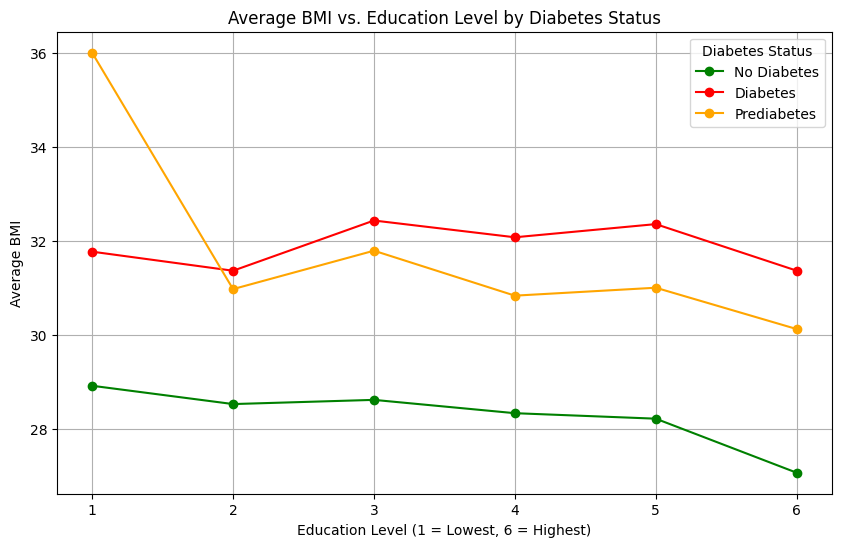

In [61]:
# Map diabetes codes to readable labels
df['DiabetesStatus'] = df['Diabetes_012'].map({
    0: 'No Diabetes',
    1: 'Prediabetes',
    2: 'Diabetes'
})

# Get sorted education levels (1–6) and prepare plot
education_levels = sorted(df['Education'].unique())
colors = {
    'No Diabetes': 'green',
    'Prediabetes': 'orange',
    'Diabetes': 'red'
}

plt.figure(figsize=(10, 6))

# Loop through each diabetes group and plot its average BMI by education level
for status in df['DiabetesStatus'].unique():
    group = df[df['DiabetesStatus'] == status]
    avg_bmi_by_edu = group.groupby('Education')['BMI'].mean()
    plt.plot(avg_bmi_by_edu.index, avg_bmi_by_edu.values, 
             label=status, color=colors[status], marker='o')

plt.title('Average BMI vs. Education Level by Diabetes Status')
plt.xlabel('Education Level (1 = Lowest, 6 = Highest)')
plt.ylabel('Average BMI')
plt.legend(title='Diabetes Status')
plt.grid(True)
plt.xticks(education_levels)
plt.show()